# 자연어 처리

# 1. 토크나이징

## 1) KoNLPy

* `pos()`: (토큰, 품사)의 쌍으로 출력
* `morphs()`: 토큰들만 출력
* `nouns()`: 명사들만 출력

In [1]:
from konlpy.tag import Okt

okt = Okt()

review = "분명 배달이 완료되었는데 나는 받지 않았엌ㅋㅋㅋ"
result = okt.pos(review) # pos(norm, stem), morphs, nouns

# for res in result:
#     print(res)

print(okt.pos(review))
print(okt.pos(review, stem=True))
print(okt.pos(review, norm=True))
print(okt.morphs(review))
print(okt.nouns(review))

[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았엌', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되어다', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받다', 'Verb'), ('않았엌', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았어', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle')]
['분명', '배달', '이', '완료', '되었는데', '나', '는', '받지', '않았엌', 'ㅋㅋㅋ']
['분명', '배달', '완료', '나', '않았엌']


## 2) Kiwi

In [2]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
review = "분명 배달이 완료되었는데 나는 받지 않았엌ㅋㅋㅋ"
result = kiwi.tokenize(review)

print(result)
print(result[0])

for res in result:
    word = res.form
    pos = res.tag
    print(word, pos)
    if pos[0] == "N":
        print(word)

    break

[Token(form='분명', tag='MAG', start=0, len=2), Token(form='배달', tag='NNG', start=3, len=2), Token(form='이', tag='JKS', start=5, len=1), Token(form='완료', tag='NNG', start=7, len=2), Token(form='되', tag='XSV', start=9, len=1), Token(form='었', tag='EP', start=10, len=1), Token(form='는데', tag='EC', start=11, len=2), Token(form='나', tag='NP', start=14, len=1), Token(form='는', tag='JX', start=15, len=1), Token(form='받', tag='VV-R', start=17, len=1), Token(form='지', tag='EC', start=18, len=1), Token(form='않', tag='VX', start=20, len=1), Token(form='었', tag='EP', start=21, len=1), Token(form='어', tag='EF', start=22, len=1), Token(form='ᆿ', tag='Z_CODA', start=22, len=1), Token(form='ㅋㅋㅋ', tag='SW', start=23, len=3)]
Token(form='분명', tag='MAG', start=0, len=2)
분명 MAG


# 2. 빈도 분석



```
# 코드로 형식 지정됨
```

* 목표: 어떤 단어가 많이 등장하는가? 의미 있는 단어가 무엇일까?

## 1) 데이터 불러오기

In [3]:
import pandas as pd
data = pd.read_csv("data/appreply.csv", index_col=0).dropna().reset_index(drop=True)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [4]:
data.to_csv("data/appreply2.csv")

In [5]:
# 저장한 데이터 다시 불러오기
data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


## 2) 데이터 전처리

In [6]:
from konlpy.tag import Okt

okt = Okt()

In [7]:
# 정규표현식으로 전처리하기
text = "오늘!!!!!!!!!!!!!!!!!!!!!!!!!!! ㅇㅇ ㅏㅏㅛ hello HELLO 010-5796-8426 기분 좋아^^ ㅎㅇ"

import re
# new_text = re.sub("[^ㄱ-ㅎ]", "", text) # 한글 자음만 출력해주세요
# print(new_text)
new_text = re.sub("[^가-힣a-zA-Z0-9-\s]", "", text) # 한글 자음만 출력해주세요
print(new_text)

오늘   hello HELLO 010-5796-8426 기분 좋아 


In [8]:
# word_list라는 빈 리스트를 만든다.
# 모든 리뷰들을 형태소 분석기에 넣는다.
# 그 리뷰들 중에 Noun만 추출한다.
# 그 토큰들을 word_list에 담는다.
   # 조건: 2글자 이상인 단어만 담는다
   # 조건: 불용어(stopwords)가 아닌 단어들만 담는다.

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    for word in result:
        if len(word) > 1 and word not in stopwords:
            word_list.append(word)
    ### 출력 메세지 ###
    print(f"{i}번째 리뷰: {new_review}")
print(word_list)

0번째 리뷰: 배달의민족 주문시 리뷰를 자주 참고하는 편입니다 한가지 건의사항이 있다면 최신순별점순 뿐만아니라 제가 주문하고자하는 메뉴를 특정해서 그 메뉴의 리뷰만 확인할 수 있는 기능이 있으면 좋을 것 같습니다 메뉴검색 기능처럼 리뷰에서도 특정 메뉴 검색기능이 필요합니다 주문수가 많지않은 메뉴의 리뷰를 보기 위해서 드래그하느라 시간이 많이 소요되는 비효율이 발생합니다 긍정적으로 검토해주심 좋을 것 같습니다
1번째 리뷰: 내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요 분명 이 가게에 시킨 기억은 있는데 뭘시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기가 너무 어렵네요 먹던 메뉴도 검색가능했으면 좋겠어요 예를 들면 곱창 을 치면 과거에 시킨 곱창목록이 뜨거나 혹은 가게 리뷰창에 내리뷰보기 가 있어도 좋을거같아요 
2번째 리뷰: 검색 화면에서 전체배달포장 탭 중 배달 탭을 스크롤 내리면서 볼 때 아래로 스크롤하는데 자꾸만 왼쪽 오른쪽으로 넘어가서 전체 탭이나 포장 탭을 보게 되는데 정말 불편합니다 검색 후 배달 탭 포장 탭 B마트 탭 뭐든 하나를 선택했으면 좌우로 넘기는 건 안 되게 하시면 안되나요 가끔 그러는 것도 아니고 스크롤 한 번 내릴 때마다 왼쪽으로 넘어가서 전체 탭에 가게 되니까 너무 불편하고 답답해서 씁니다
3번째 리뷰: 배달팁 낮은 순으로 정렬하면 원 이런식으로 된 가게가 가장 위로 올라옵니다 그리고 지역에 따라 추가 배달료가 있다고 별도로 체크하게 되어있어서 결국 배달팁은 원이 넘습니다 만원 이상 시키면 배달팁 원이라는데 장난하는 것도 아니고 결국 하나하나 눌러가면서 가격대별 금액을 체크하고 배달팁 별도로 받는지도 확인해야합니다
4번째 리뷰: 최근 업데이트가 안드로이드사양 정도에서는 안되는것 같습니다 배민 어플 실행시 업데이트 하라고 나오고 업데이트 누르면 업데이트 진행은 안되고 열기 나오고 열기 누르면 업데이트 나오고 무한반복 수없이 삭제와 재설치 환경설정등을 해보아도 같은 증상이네요 다른분들도 다 같은 증상으로 보이는 글들을 보니 이번 

## 3) 워드클라우드

In [9]:
print(word_list)

['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심', '주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기', '검색', '화면', '전체', '배달', '포장', '배달', '크롤', '아래', '크롤', '자꾸만', '왼쪽', '오른쪽', '전체', '포장', '정말', '검색', '배달', '포장', '마트', '하나', '선택', '좌우', '가끔', '크롤', '왼쪽', '전체', '가게', '배달', '정렬', '가게', '가장', '위로', '지역', '추가', '배달', '별도', '체크', '배달', '만원', '이상', '배달', '장난', '하나', '하나', '가격', '대별', '금액', '체크', '배달', '별도', '확인', '최근', '업데이트', '안드로이드', '사양', '정도', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트', '매장', '구분', '대체', '언제', '이면', '개선', '독점', '해이', '건가', '결제', '관련', '부분', '정말', '별로', '구성', '정말', '페이'

In [10]:
# 키:값 => 단어:빈도 수
from collections import Counter

counter = Counter(word_list)
print(counter)
print(counter.most_common(30))

Counter({'배달': 941, '주문': 543, '가게': 373, '리뷰': 352, '메뉴': 341, '사용': 282, '결제': 243, '기능': 234, '어플': 223, '검색': 197, '음식': 193, '시간': 189, '업데이트': 178, '쿠폰': 176, '다시': 168, '취소': 156, '확인': 139, '고객': 127, '화면': 126, '전화': 124, '개선': 121, '다른': 115, '로그인': 115, '계속': 113, '이용': 109, '추가': 108, '문제': 103, '생각': 102, '선택': 100, '사람': 94, '경우': 91, '진짜': 91, '오류': 89, '정말': 86, '그냥': 84, '설정': 83, '하나': 82, '삭제': 78, '매장': 78, '사항': 76, '요청': 73, '이벤트': 72, '기사': 71, '인증': 70, '별로': 69, '바로': 69, '사진': 68, '입력': 66, '시스템': 66, '포장': 64, '서비스': 64, '음식점': 63, '업체': 63, '목록': 62, '한번': 62, '때문': 62, '할인': 61, '카드': 61, '주소': 60, '센터': 60, '자주': 58, '이상': 58, '연결': 58, '부분': 57, '등록': 57, '금액': 55, '정도': 55, '처음': 55, '광고': 54, '가입': 54, '보고': 53, '문의': 53, '답변': 52, '보기': 51, '만원': 50, '식당': 49, '번호': 49, '해당': 49, '요즘': 49, '상담': 48, '지도': 48, '자체': 47, '표시': 47, '지금': 47, '위치': 46, '버튼': 46, '기본': 45, '정보': 45, '사용자': 44, '방법': 44, '카테고리': 44, '예전': 43, '완료': 43, '수정': 42, '마트': 41, '가

In [11]:
# (한번 해보기) Counter 없이 딕셔너리로 코딩해보기

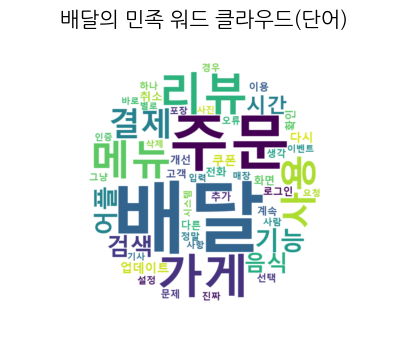

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
from PIL import Image
import numpy as np

image = Image.open("Images/image.png")
mask_img = np.array(image)

wc = WordCloud(
    font_path = "C:\Windodws\Fonts\malgunbd.ttf",
    mask=mask_img,
    background_color="white",
    width=800,
    height=400
)

## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
wc.generate_from_frequencies(dict(counter.most_common(50)))

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
plt.show()

## 4) 리뷰 검색

In [13]:
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [14]:
keyword = "결제"

# 조건: data에 text열에서 keyword가 속해있어야 한다.
extract_data = data.loc[data["text"].str.contains(keyword),:]
extract_data

,text,score
5,찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...,2
6,"앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...",5
11,"결제 수단에 현장 결제 아예 없애버렸네요,. 코로나 때문에 비대면 권장하는건 알겠지...",4
20,"비회원으로 주문하고 kb pay로 결제해서 ""결제가 완료되었습니다"" 라고 됐는데 (...",1
23,결제취소가 너무 어렵습니다. 가게에 전화하니 본인들도 취소할 수 없다며 제가 배민에...,1
...,...,...
982,결제전에 다른 음식을 시키려고 뒤로가기 눌렀는데 결제 완료됩니다. 그리고 1.5초도...,1
983,바로 결제가 안되어서 리뷰를 못적었습니다. 중국집 같은경우 대게 짬뽕 짜장만 셋트가...,1
987,잘 사용하고잇습니다~ 놀러가서도 사용할수잇어서 편하구요ㅎㅎ 다만..제가 친구네서 시...,4
993,제가 배민어플 거의 매달 vip 실적 오를만큼 엄청 이용하는데요 주문시키면 매장 전...,1


In [15]:
for i, review in enumerate(extract_data["text"]):
    print(f"{i}번째 리뷰: {review}")
    print("="*100)

0번째 리뷰: 찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유명한 앱 치고 결제 관련 부분도 정말 별로고, 앱 구성이 정말 단순합니다. 배민페이 사용절차가 힘들어 안쓰고 있구요. 다른것보다도 찜해놓은 매장들 한식, 양식, 중식, 카페.. 업종별로라도 구분 좀 시켜주세요. ㄱㄴㄷ순으로도 안되어 있고... 찜매장이 한두개도 아닌데, 이름을 전부 외울수도 없고... 매번 찾기가 어려워서 재검색하거나 주문했던 목록에서 찾고 들어갑니다.
1번째 리뷰: 앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 입력 선택 후 주문 결제 시 받을 주소를 설정하는 것으로 순서를 변경하면 어떨까요? 저는 필요할 때만 어플을 설치해서 삭제, 설치를 자주 하는 편인데요! 다시 사용하려고 재설치하고 실행하면 회원정보에 주소 저장을 해놨음에도 어플 실행하면 로그인 여부 안 물어보고 주소를 다시 설정해야해서 불편해요 ㅜ.. 처음에 주소를 설정해도 주문할 때 어차피 로그인할 건데 시간이 매번 추가로 드네요 저같이 어플을 사용하는 사람이 많지는 않겠지만 혹시 굳이 주문도 하지 않은 상태에서 주소부터 설정하는 이유가 따로 있을까요? 수정하기 어려운 사항이라면 제가 그냥 어플을 삭제하지 않고 사용하겠지만 순서를 바꾸는 정도라면 어렵지 않을 거 같고 사용자로서 굳이 주소부터 설정할 필요가 없을 거 같아서 의견 남겨봅니다! 어떨까요!
2번째 리뷰: 결제 수단에 현장 결제 아예 없애버렸네요,. 코로나 때문에 비대면 권장하는건 알겠지만 이제 마스크 착용 필수화도 사라지는 추세인데 왜 없앤건지... +배민1에만 제한된 거였군요ㅠ 예전부터 그랬는지 모르겠는데 암튼 배민1은 현장 결제가 안돼서 조금 아쉽네요.. 그래도 배달 어플 중에 가장 잘 사용하고 있습니다
3번째 리뷰: 비회원으로 주문하고 kb pay로 결제해서 "결제가 완료되었습니다" 라고 됐는데 (처음이라 잘 몰라서 2번 반복해서 결제) 확인차 매장에 전화하니 결제가 안됐다고, 배민에 전

# 3. 긍부정 분석

## 1) 데이터 불러오기

In [16]:
import pandas as pd
data = pd.read_csv("data/appreply2.csv", index_col=0)
data

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3
...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1


In [17]:
# (미션) reaction열을 만드는데 score가 4이상이면 긍정(1), 그 외는 부정(0)으로 나타내주세요
data["reaction"] = np.where(data["score"] >= 4, 1, 0)
data.head()

,text,score,reaction
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,0


In [18]:
data.to_csv("data/appreply3.csv")

In [19]:
import pandas as pd

data = pd.read_csv("data/appreply3.csv", index_col=0)
data

,text,score,reaction
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4,1
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5,1
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1,0
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2,0
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3,0
...,...,...,...
995,갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...,1,0
996,기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...,3,0
997,요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...,3,0
998,취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...,1,0


## 2) 데이터 탐색

In [20]:
# 긍부정 비율이 어떻게 되나요?
data["reaction"].value_counts()

reaction
0    729
1    271
Name: count, dtype: int64

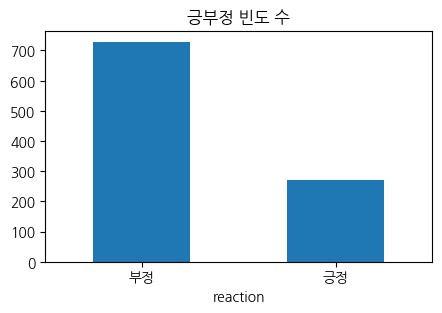

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(5,3))
data["reaction"].value_counts().plot(kind="bar")
plt.title("긍부정 빈도 수")
plt.xticks(ticks=[0, 1], labels=["부정", "긍정"], rotation=0)
plt.show()

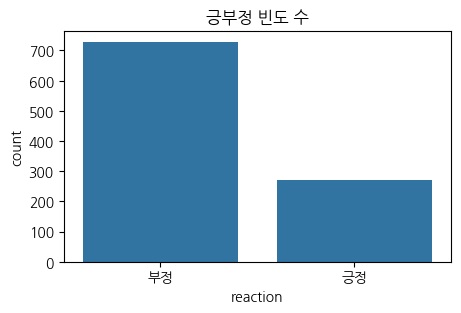

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x="reaction")
plt.title("긍부정 빈도 수")
plt.xticks(ticks=[0, 1], labels=["부정", "긍정"], rotation=0)
plt.show()

In [23]:
# reaction==1인 데이터 data_pos
# reaction==0인 데이터 data_neg
data_pos = data.loc[data["reaction"]==1, :]
print(data_pos.shape)
data_neg = data.loc[data["reaction"]==0, :]
print(data_neg.shape)

(271, 3)
(729, 3)


## 3) 데이터 전처리

In [24]:
word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    for word in result:
        if len(word) > 1 and word not in stopwords:
            word_list.append(word)
    ### 출력 메세지 ###
    print(f"{i}번째 리뷰: {new_review}")
print(word_list)

0번째 리뷰: 배달의민족 주문시 리뷰를 자주 참고하는 편입니다 한가지 건의사항이 있다면 최신순별점순 뿐만아니라 제가 주문하고자하는 메뉴를 특정해서 그 메뉴의 리뷰만 확인할 수 있는 기능이 있으면 좋을 것 같습니다 메뉴검색 기능처럼 리뷰에서도 특정 메뉴 검색기능이 필요합니다 주문수가 많지않은 메뉴의 리뷰를 보기 위해서 드래그하느라 시간이 많이 소요되는 비효율이 발생합니다 긍정적으로 검토해주심 좋을 것 같습니다
1번째 리뷰: 내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요 분명 이 가게에 시킨 기억은 있는데 뭘시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기가 너무 어렵네요 먹던 메뉴도 검색가능했으면 좋겠어요 예를 들면 곱창 을 치면 과거에 시킨 곱창목록이 뜨거나 혹은 가게 리뷰창에 내리뷰보기 가 있어도 좋을거같아요 
2번째 리뷰: 검색 화면에서 전체배달포장 탭 중 배달 탭을 스크롤 내리면서 볼 때 아래로 스크롤하는데 자꾸만 왼쪽 오른쪽으로 넘어가서 전체 탭이나 포장 탭을 보게 되는데 정말 불편합니다 검색 후 배달 탭 포장 탭 B마트 탭 뭐든 하나를 선택했으면 좌우로 넘기는 건 안 되게 하시면 안되나요 가끔 그러는 것도 아니고 스크롤 한 번 내릴 때마다 왼쪽으로 넘어가서 전체 탭에 가게 되니까 너무 불편하고 답답해서 씁니다
3번째 리뷰: 배달팁 낮은 순으로 정렬하면 원 이런식으로 된 가게가 가장 위로 올라옵니다 그리고 지역에 따라 추가 배달료가 있다고 별도로 체크하게 되어있어서 결국 배달팁은 원이 넘습니다 만원 이상 시키면 배달팁 원이라는데 장난하는 것도 아니고 결국 하나하나 눌러가면서 가격대별 금액을 체크하고 배달팁 별도로 받는지도 확인해야합니다
4번째 리뷰: 최근 업데이트가 안드로이드사양 정도에서는 안되는것 같습니다 배민 어플 실행시 업데이트 하라고 나오고 업데이트 누르면 업데이트 진행은 안되고 열기 나오고 열기 누르면 업데이트 나오고 무한반복 수없이 삭제와 재설치 환경설정등을 해보아도 같은 증상이네요 다른분들도 다 같은 증상으로 보이는 글들을 보니 이번 

In [25]:
def get_word_list(df, stopword_list):
    """리뷰 데이터프레임과 불용어 리스트를 입력하면 word_list를 반환해주는 함수"""
    word_list = []

    for i, review in enumerate(df["text"].tolist()):
        # STEP1: 데이터 전처리
        new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
        # STEP2: 형태소 분석
        result = okt.nouns(new_review)
        # STEP3: 조건에 맞는 단어 담기
        for word in result:
            if len(word) > 1 and word not in stopword_list:
                word_list.append(word)
        ### 출력 메세지 ###
        # print(f"{i}번째 리뷰: {new_review}")
    return word_list

In [26]:
stopwords = ["배민", "민족"]

word_list_pos = get_word_list(data_pos, stopwords)
word_list_neg = get_word_list(data_neg, stopwords)

In [27]:
print(word_list_pos)
print(word_list_neg)

['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심', '주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기', '실행', '로그인', '여부', '먼저', '비회', '이용', '선택', '경우', '나중', '입력', '선택', '주문', '결제', '주소', '설정', '순서', '변경', '어플', '설치', '삭제', '설치', '자주', '다시', '사용', '설치', '실행', '회원정보', '주소', '저장', '어플', '실행', '로그인', '여부', '주소', '다시', '설정', '처음', '주소', '설정', '주문', '어차피', '로그', '시간', '매번', '추가', '드네', '어플', '사용', '사람', '혹시', '굳이', '주문', '상태', '주소', '설정', '이유', '수정', '사항', '라면', '그냥', '어플', '삭제', '사용', '순서', '정도', '라면', '사용자', '로서', '굳이', '주소', '설정', '필요', '의견', '이용', '사용자', '가지', '건의', '사항', '리뷰', '대신', '방문', '표시', '방문', '표시', '생각', '혹시', '건의', '사항', '다시', '정말', '정말', '결제', '수단', '현장', '결제', '아예', '코로나', '때문', '비대', '권장', '이제', '마스크', '착용', '필수', '추세',

## 4) 워드클라우드

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image
import numpy as np
from collections import Counter

def draw_wordcloud(word_list, top_n=None):
    """word_list를 받으면 Counter로 빈도 수를 센 후 워드 클라우드를 그리고 counter를 반환하는 함수"""
    counter = Counter(word_list)
    # print(counter)
    # print(counter.most_common(30))
    
    ## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
    image = Image.open("Images/image.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = "C:\Windodws\Fonts\malgunbd.ttf",
        mask=mask_img,
        background_color="white",
        width=800,
        height=400
    )

    ## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
    plt.show()

    return counter

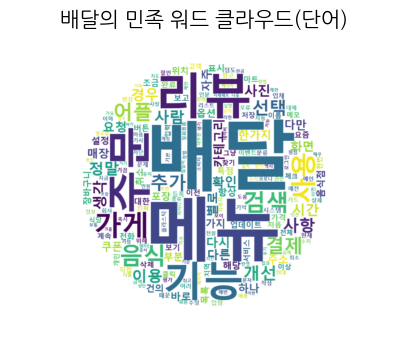

Counter({'배달': 232, '메뉴': 188, '리뷰': 179, '주문': 147, '기능': 127, '가게': 127, '사용': 112, '음식': 91, '검색': 88, '어플': 64, '결제': 58, '추가': 53, '선택': 49, '개선': 46, '사항': 42, '이용': 39, '사람': 38, '정말': 38, '생각': 37, '경우': 33, '시간': 32, '사진': 31, '확인': 28, '별로': 28, '다시': 27, '카테고리': 27, '요청': 27, '화면': 25, '다른': 25, '자주': 24, '한가지': 24, '다만': 24, '매장': 24, '하나': 23, '주소': 22, '쿠폰': 22, '바로': 22, '가지': 21, '포장': 20, '옵션': 20, '부분': 20, '항상': 19, '음식점': 19, '건의': 18, '목록': 18, '설정': 18, '해당': 18, '표시': 17, '위치': 17, '장바구니': 17, '취소': 17, '특정': 16, '조금': 16, '업데이트': 16, '대한': 16, '보고': 16, '버튼': 16, '보기': 15, '가격': 15, '전화': 15, '완료': 15, '요즘': 15, '서비스': 15, '마트': 15, '삭제': 14, '처음': 14, '계속': 14, '이전': 14, '저장': 13, '이상': 13, '이름': 13, '메모': 13, '클릭': 13, '지역': 13, '찾기': 12, '입력': 12, '그냥': 12, '개인': 12, '식당': 12, '직접': 12, '고객': 12, '한번': 12, '체크': 12, '전체': 12, '정도': 11, '시스템': 11, '이벤트': 11, '입장': 11, '업체': 11, '등록': 11, '진짜': 11, '참고': 10, '위해': 10, '때문': 10, '분류': 10, '여러': 10, '문제': 10, '현재

In [29]:
result = draw_wordcloud(word_list_pos)
print(result)

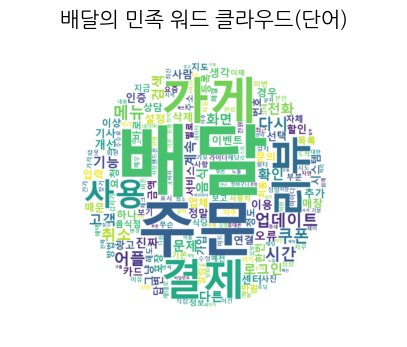

Counter({'배달': 709, '주문': 396, '가게': 246, '결제': 185, '리뷰': 173, '사용': 170, '업데이트': 162, '어플': 159, '시간': 157, '쿠폰': 154, '메뉴': 153, '다시': 141, '취소': 139, '고객': 115, '확인': 111, '검색': 109, '전화': 109, '로그인': 107, '기능': 107, '음식': 102, '화면': 101, '계속': 99, '문제': 93, '다른': 90, '오류': 80, '진짜': 80, '개선': 75, '그냥': 72, '이용': 70, '설정': 65, '생각': 65, '인증': 65, '삭제': 64, '기사': 63, '이벤트': 61, '하나': 59, '센터': 59, '경우': 58, '사람': 56, '추가': 55, '시스템': 55, '연결': 55, '매장': 54, '입력': 54, '할인': 52, '때문': 52, '업체': 52, '선택': 51, '문의': 51, '카드': 51, '한번': 50, '광고': 50, '서비스': 49, '가입': 49, '정말': 48, '금액': 48, '답변': 48, '바로': 47, '요청': 46, '등록': 46, '이상': 45, '상담': 45, '번호': 45, '포장': 44, '정도': 44, '목록': 44, '음식점': 44, '만원': 43, '자체': 42, '지도': 42, '별로': 41, '처음': 41, '지금': 39, '알림': 38, '방법': 38, '주소': 38, '부분': 37, '기본': 37, '보고': 37, '식당': 37, '사진': 37, '보기': 36, '정보': 36, '해도': 36, '사용자': 36, '무슨': 35, '예전': 34, '자주': 34, '사항': 34, '해결': 34, '요즘': 34, '이제': 34, '이번': 33, '라이더': 33, '제대로': 33, '수정': 33, 

In [30]:
result = draw_wordcloud(word_list_neg)
print(result)

### + 함수 응용(most common 반영하기)

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image
import numpy as np
from collections import Counter

def draw_wordcloud(word_list, top_n=None):
    """word_list를 받으면 Counter로 빈도 수를 센 후 워드 클라우드를 그리고 counter를 반환하는 함수"""
    counter = Counter(word_list)
    # print(counter)
    # print(counter.most_common(30))

    if top_n is not None:
        counter = dict(counter.most_common(top_n))

    ## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
    image = Image.open("Images/image.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = "C:\Windodws\Fonts\malgunbd.ttf",
        mask=mask_img,
        background_color="white",
        width=800,
        height=400
    )

    ## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
    wc.generate_from_frequencies(counter)

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("배달의 민족 워드 클라우드(단어)", fontsize=15)
    plt.show()

    return counter

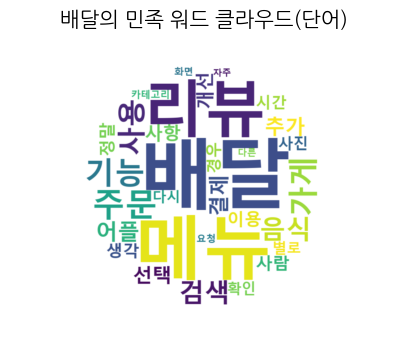

{'배달': 232, '메뉴': 188, '리뷰': 179, '주문': 147, '기능': 127, '가게': 127, '사용': 112, '음식': 91, '검색': 88, '어플': 64, '결제': 58, '추가': 53, '선택': 49, '개선': 46, '사항': 42, '이용': 39, '사람': 38, '정말': 38, '생각': 37, '경우': 33, '시간': 32, '사진': 31, '확인': 28, '별로': 28, '다시': 27, '카테고리': 27, '요청': 27, '화면': 25, '다른': 25, '자주': 24}


In [32]:
result = draw_wordcloud(word_list_pos, top_n=30)
print(result)

# 4. 장바구니 분석

## 1) 데이터 불러오기

In [33]:
data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


## 2) 데이터 전처리

In [34]:
# word_list = [리뷰1 단어1, 리뷰1 단어2, 리뷰2 단어1, 리뷰2 단어2, 리뷰2 단어3 ......]

In [35]:
# main_list = [[리뷰1 단어1 리뷰1 단어2], [리뷰2 단어1, 리뷰2 단어2, 리뷰3 단어3], ....]

In [36]:
main_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["text"].tolist()):
    # STEP1: 데이터 전처리
    new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
    # STEP2: 형태소 분석
    result = okt.nouns(new_review)
    # STEP3: 조건에 맞는 단어 담기
    sub_list = []
    for word in result:
        if len(word) > 1 and word not in stopwords:
            sub_list.append(word)
    main_list.append(sub_list)
    ### 출력 메세지 ###
    print(f"{i}번째 리뷰: {new_review}")
print(main_list)

0번째 리뷰: 배달의민족 주문시 리뷰를 자주 참고하는 편입니다 한가지 건의사항이 있다면 최신순별점순 뿐만아니라 제가 주문하고자하는 메뉴를 특정해서 그 메뉴의 리뷰만 확인할 수 있는 기능이 있으면 좋을 것 같습니다 메뉴검색 기능처럼 리뷰에서도 특정 메뉴 검색기능이 필요합니다 주문수가 많지않은 메뉴의 리뷰를 보기 위해서 드래그하느라 시간이 많이 소요되는 비효율이 발생합니다 긍정적으로 검토해주심 좋을 것 같습니다
1번째 리뷰: 내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요 분명 이 가게에 시킨 기억은 있는데 뭘시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기가 너무 어렵네요 먹던 메뉴도 검색가능했으면 좋겠어요 예를 들면 곱창 을 치면 과거에 시킨 곱창목록이 뜨거나 혹은 가게 리뷰창에 내리뷰보기 가 있어도 좋을거같아요 
2번째 리뷰: 검색 화면에서 전체배달포장 탭 중 배달 탭을 스크롤 내리면서 볼 때 아래로 스크롤하는데 자꾸만 왼쪽 오른쪽으로 넘어가서 전체 탭이나 포장 탭을 보게 되는데 정말 불편합니다 검색 후 배달 탭 포장 탭 B마트 탭 뭐든 하나를 선택했으면 좌우로 넘기는 건 안 되게 하시면 안되나요 가끔 그러는 것도 아니고 스크롤 한 번 내릴 때마다 왼쪽으로 넘어가서 전체 탭에 가게 되니까 너무 불편하고 답답해서 씁니다
3번째 리뷰: 배달팁 낮은 순으로 정렬하면 원 이런식으로 된 가게가 가장 위로 올라옵니다 그리고 지역에 따라 추가 배달료가 있다고 별도로 체크하게 되어있어서 결국 배달팁은 원이 넘습니다 만원 이상 시키면 배달팁 원이라는데 장난하는 것도 아니고 결국 하나하나 눌러가면서 가격대별 금액을 체크하고 배달팁 별도로 받는지도 확인해야합니다
4번째 리뷰: 최근 업데이트가 안드로이드사양 정도에서는 안되는것 같습니다 배민 어플 실행시 업데이트 하라고 나오고 업데이트 누르면 업데이트 진행은 안되고 열기 나오고 열기 누르면 업데이트 나오고 무한반복 수없이 삭제와 재설치 환경설정등을 해보아도 같은 증상이네요 다른분들도 다 같은 증상으로 보이는 글들을 보니 이번 

KeyboardInterrupt: 

In [ ]:
print(main_list)
for i in main_list:
    print(i)

## 3) 연관성 분석

```
uv add mlxtend
```

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
te_arr

In [ ]:
df = pd.DataFrame(te_arr, columns=te.columns_)

df

In [ ]:
# 각 단어가 출현한 횟수
df.sum(axis=0)

In [ ]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
frequent_itemsets

* support: $P(A\cap B)$
* confidence: $P(B|A)=\dfrac{P(A\cap B)}{P(A)}$
* lift: $\dfrac{P(B|A)}{P(B)}$

lift 의 값이 높다는 것은   
B가 단돈으로 나올 확률보다 A가 있을때 B가 나올 확률이 더 높다는 것

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

## 4) 시각화

In [ ]:
# (전화, 취소) => "전화,취소"   (주문, 배달) => "배달,주문"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

rules["antecedents_str"] = rules["antecedents"].apply(lambda x: ",".join(sorted(list(x)))) # 질문: ,로 join 을 하는 이유는?
rules["consequents_str"] = rules["consequents"].apply(lambda x: ",".join(sorted(list(x))))

rules[["antecedents_str", "consequents_str", "support", "confidence", "lift"]]

In [ ]:
pivot_data = rules.pivot_table(
    index="antecedents_str",
    columns="consequents_str",
    values="lift",
    fill_value=0
)
pivot_data

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Lift 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

# 5. 네트워크 분석

```
uv add networkx
```

In [ ]:
rules.head()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
for _, row in rules.iterrows():
    # 단어 추출
    antecedent = ",".join(row["antecedents"])
    consequent = ",".join(row["consequents"])
    weight = row["lift"]

    # 노드 추가
    G.add_edge(antecedent, consequent, weight=weight)

In [ ]:
for temp in rules.iterrows():
    print(temp)

In [ ]:
G.edges()

In [ ]:
G["가게"]["기능"]

In [ ]:
# 3. 노드 배치
# pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, seed=15)

# 4. 가중치 추출
edge_weights = [G[u][v]["weight"] for u, v in G.edges()]

# 5. 노드 스타일 지정 및 그리기
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="Malgun Gothic")

# edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("단어 간 연관 규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()

# 6. 인코딩/벡터라이징

```
uv add scikit-learn
```

## 1) 인코딩

In [ ]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다"
]

### 정수 인코딩

In [ ]:
# sentences를 스페이스 기준으로 쪼갠다.
# 그 단어들의 집합을 만든다.
tokens = []

for sent in sentences:
    temp = sent.split()
    tokens.extend(temp)

print(tokens)
token_set = set(tokens)
print(token_set)

In [ ]:
from sklearn.preprocessing import LabelEncoder

print(f"입력값: {list(token_set)}")
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(list(token_set))
print(f"출력값: {encoded}")
print(f"어떤 기준인가요? {label_encoder.classes_}")

In [ ]:
mydict = {}
for i, key in enumerate(label_encoder.classes_):
    mydict[str(key)] = i

mydict

In [ ]:
label_encoder.transform(["나는", "기분이", "나쁘다"])

### 원-핫 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

tokens_numpy = np.array(list(token_set))
print(tokens_numpy)
print("="*50)

tokens_arr = tokens_numpy.reshape(-1, 1)
print(f"입력값:\n{tokens_arr}")
print("="*50)

oh_encoder = OneHotEncoder()
encoded = oh_encoder.fit_transform(tokens_arr)
print(f"출력값:\n{encoded.toarray()}")
print(f"어떤 기준인가요? {oh_encoder.categories_}")

In [ ]:
oh_encoder.categories_

## 2) 벡터라이징

### BoW(Bag of Words)

In [ ]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다",
    "집에 가고 싶다"
]

In [ ]:
# 미션: 딕셔너리 만들기(단어: 빈도, 형태의 딕셔너리 만들기)
mydict = {}
for sent in sentences:
    # 만약에 word가 mydict의 키에 있으면 +1을 하고, 아니면 word를 키로 만들어서 값을 1로 만든다.
    for word in sent.split():
        if word in mydict:
            mydict[word] += 1
        else:
            mydict[word] = 1
    print(mydict)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(bow_matrix.toarray())

### TF-IDF

자연어 처리(NLP)에서 텍스트를 숫자 벡터로 바꾸는 방법 중 하나입니다.   
다른 벡터라이징 방식들과 비교해볼 때, **"각 단어가 문서에서 얼마나 중요한지를 수치화"**한다는 점이 핵심이에요.

count 를 기반으로 계산됨

TF (Term Frequency)
→ 문서 내 특정 단어가 얼마나 자주 나오는가?   
예: "apple apple orange" → apple의 TF는 2/3
   
IDF (Inverse Document Frequency)   
→ 여러 문서 중 얼마나 희귀한가?   
→ 많이 나오는 흔한 단어는 점수가 낮아짐   
   
TF × IDF = 최종 가중치 (중요도)   
→ 자주 나오면서도 희귀한 단어일수록 높은 점수를 받음   

In [ ]:
# 질문 : 이건 뭐하는 거임?
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(tfidf_matrix.toarray())

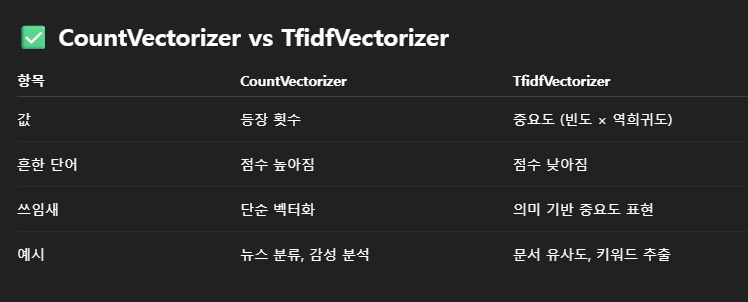

### 유사도 분석

In [ ]:
print(sentences)

In [ ]:
# 질문 : 각 열이 의미하는 것은?
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(tfidf_matrix)
print(similarity)

# ======== 구분선 ========

---

# 1. 토크나이징

In [ ]:
# 테스트 코드
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

In [ ]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.pos(text)

for res in result:
    print(res)

In [ ]:
from konlpy.tag import Kkma # Okt, Kkma

kkma = Kkma()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = kkma.pos(text)

for res in result:
    print(res)

In [ ]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result1 = okt.pos(text) # pos, morphs, nouns
result2 = okt.morphs(text)
result3 = okt.nouns(text)

print(result1)
print(result2)
print(result3)

In [ ]:
text1 = "나는 밥을 먹었엌ㅋㅋㅋ"
text2 = "나는 밥을 먹었다"

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm=True)
result3 = okt.pos(text2, stem=True)

print(result1)
print(result2)
print(result3)

## 1) 데이터 불러오기

In [ ]:
# 데이터 불러오기
# 미션1: 첫번째 데이터 댓글을 형태소 분석기로 쪼개보기
# 미션2: 처음부터 5개의 데이터 댓글을 추출해서 반복문으로 형태소 분석기로 쪼개보기
import pandas as pd

data = pd.read_csv("data/배달의민족댓글.csv", index_col=0)
data.head()

In [ ]:
# 방법1. 데이터를 인덱스 3부터 끝까지 가져오기
data1 = data.iloc[3:,:].reset_index(drop=True)
data1.head()

In [ ]:
# 방법2. 결측치 제거
data2 = data.dropna().reset_index(drop=True)
data2.head()

In [ ]:
# 데이터 저장하기
data1.to_csv("data/배달의민족댓글2.csv")

In [ ]:
# 데이터 불러오기
data = pd.read_csv("data/배달의민족댓글2.csv", index_col=0)
data

In [ ]:
# 첫번째 댓글 가져오기
review_one = data["댓글"][0]
print(review_one)

from konlpy.tag import Okt
okt = Okt()

result = okt.pos(review_one)
print(result)

In [ ]:
# 처음부터 다섯개의 댓글 가져오기
review_five = data["댓글"][:5]

for i, review in enumerate(review_five.tolist()):
    result = okt.pos(review)
    # print(result)
    temp_list = []
    for word, pos in result:
        if pos == "Noun":
            temp_list.append(word)
            # print(word, pos)
    print(f"{i}번째 Noun 형태소 분석기 결과:\n\t{temp_list}")

    # print(f"{i}번째 형태소 분석기 결과:\n\t{result}")

## 2) 데이터 전처리

In [ ]:
text = "오늘!!!!!!!!!!!!!!!!!! ㅇㅇ너무 ㅓㅣㅗ hello  HELLO 010-7894-5798   기분 좋아^^ ㅎㅇㅎㅇ"

import re
new_text = re.sub("[^0-9a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ-\s]", "", text)
# new_text = re.sub("[^0-9a-zA-Z가-힣\s+-]", "", text)
print(new_text)

In [ ]:
# 워드 클라우드
# 목표: 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거(stopwords)
# 조건3: 한 글자인 단어는 포함하지 않는다.

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["댓글"].tolist()):
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.nouns(new_review)
    for word in result:
        # 조건2 | 조건3
        if len(word) == 1 or word in stopwords:
            continue
        # word_list에 추가
        word_list.append(word)
    print(f"{i}번째 리뷰: {result}")

In [ ]:
word_list

In [ ]:
from collections import Counter

example = ["남", "여", "여", "남", "남", "남"]
counter = Counter(example)
print(counter)

In [ ]:
counter = Counter(word_list)
print(counter)
print(counter.most_common(30)) # 가장 많이 발생한 것 30개

## 3) 워드 클라우드

In [ ]:
# 내 시스템 폰트에서 "gothic"인 폰트와 그 경로 찾기
from matplotlib import font_manager

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower():
        print(font_name, font_path )

```
uv add wordcloud
```

In [ ]:
"Malgun Gothic"

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

wc = WordCloud(
    font_path = "C:\Windows\Fonts\H2MJRE.ttf",
    background_color="white",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np

image = Image.open("Images/image.png")
mask_img = np.array(image)

wc = WordCloud(
    # font_path = "C:\Windows\Fonts\NanumBarunpenR.ttf",
    font_path = "Fonts/NanumBarunpenR.ttf",
    mask=mask_img,
    background_color="white",
    colormap="coolwarm",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

## 4) 미션

In [ ]:
# 배달의민족 댓글 "동사"에 대한 워드 클라우드
# norm, stem 옵션 이용
# 명사에서 진행한 정규표현식, 1글자는 제외 조건은 동일
# gpt이용해서 새로운 마스크 만들어보고 적용해보기

In [ ]:
# 워드 클라우드
# 목표: 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거(stopwords)
# 조건3: 한 글자인 단어는 포함하지 않는다.

verb_list = []

for i, review in enumerate(data["댓글"].tolist()):
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.pos(new_review, stem=True, norm=True)
    for word, pos in result:
        # 조건2 & 조건3
        if len(word) > 1 and pos == "Verb":
            verb_list.append(word)
    print(f"{i}번째 리뷰: {result}")

In [ ]:
counter2 = Counter(verb_list)
print(counter2)
print(counter2.most_common(30)) # 가장 많이 발생한 것 30개

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image
import numpy as np

image = Image.open("Images/image.png")
mask_img = np.array(image)

wc = WordCloud(
    # font_path = "C:\Windows\Fonts\malgunsl.ttf",
    font_path = "Fonts/NanumBarunpenR.ttf",
    mask=mask_img,
    background_color="white",
    colormap="coolwarm",
    width=800,
    height=400
)

wc.generate_from_frequencies(counter2)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()

## 5) 검색

In [ ]:
# 명사들을 추출한 워드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?
# "취소" 단어가 있는 문장들만 검색
keyword = "취소"

extract_data = data.loc[data["댓글"].str.contains(keyword),:]
extract_data.head()

In [ ]:
for review in extract_data["댓글"]:
    print(review)
    print("="*100)

## + Kiwi 형태소 분석기 체험

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"

for res, score in kiwi.analyze(text, top_n=5):
    print(score, result, sep="\t")

In [ ]:
text = "분명 배달이 완료되었는데 나는 받지 않았어"

kiwi = Kiwi()
result = kiwi.tokenize(text)
print(result)

In [ ]:
# 명사만 추출
for res in result:
    if res.tag[0] == "N":
        print(res.form, res.tag)

# 2. 장바구니 분석

In [ ]:
data = pd.read_csv("data/배달의민족댓글2.csv", index_col=0)
data.head()

In [ ]:
# 워드 클라우드
# 목표: 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거(stopwords)
# 조건3: 한 글자인 단어는 포함하지 않는다.

word_list = []
stopwords = ["배민", "민족"]

for i, review in enumerate(data["댓글"].tolist()):
    # 조건1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기
    result = okt.nouns(new_review)
    for word in result:
        # 조건2 | 조건3
        if len(word) == 1 or word in stopwords:
            continue
        # word_list에 추가
        word_list.append(word)
    print(f"{i}번째 리뷰: {result}")

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
# 빈 리스트 만들기 main_list
# 댓글을 반복문으로 하나씩 추출
# 전처리 과정 그대로
# 댓글 형태소 분석
# 빈 리스트 만들기 sub_list
# 반복문으로 형태소 명사 단어들 담기
# sub_list에 명사 단어들 담기
# main_list에 sub_list 담기
main_list = []

for i, review in enumerate(data["댓글"].tolist()):
    # 조건 1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기에 넣기
    result = okt.pos(new_review)
    sub_list = []
    for word, pos in result:
        if pos == "Noun" and len(word) > 1:
            sub_list.append(word)
    main_list.append(sub_list)

    print(f"{i}번째 리뷰: {result}")

In [ ]:
for temp in main_list:
    print(temp)

In [ ]:
# main_list는 [[리뷰1에 대한 명사 단어들], [리뷰2에 대한 명사 단어들], .....] 형식으로 저장되어야 한다.

```
uv add mlxtend
```

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df


In [ ]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=1.0)
print(rules)

## + 간단 예제로 보기

In [ ]:
main_list = [
    ["밥", "국", "김치"],
    ["밥", "국"],
    ["밥", "김치"],
    ["라면", "김치"],
    ["밥", "반찬"],
    ["국", "김치"]
]

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)
df

In [ ]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules